# **GRUPO 07 - ALGAS**
**Caetano Domingues, Davi Hilário, Daniel Andrade, Danielle Yumi
Munakata, Eduardo Corrêa e Gustavo Pereira Castro**

### Importando Bibliotecas

In [ ]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import time
import sys
import math
import psutil as ps
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector
from datetime import datetime
import random
import matplotlib.dates as mdates
import datetime
from datetime import timedelta
import json

### Criando conexão com o banco de dados

In [ ]:
mydb = mysql.connector.connect(
  host="localhost",
  user="urubu100",
  password="urubu100",
  database="algas"
)

mycursor = mydb.cursor()
sql = "INSERT INTO dados (valor) VALUES (%s)"

### Definindo Funções

Função get_transactions()

In [ ]:
def get_transactions(start, stop, step):
    transactions = []
    for i in range(start, stop, step):
        transactions.append(i)
    return transactions

Função get_time()

In [ ]:
def get_time():
    agora = time.time()
    hoje_meia_noite = datetime.combine(datetime.today(), datetime.min.time())
    meia_noite_timestamp = time.mktime(hoje_meia_noite.timetuple())
    diferenca_segundos = agora - meia_noite_timestamp
    diferenca_minutos = diferenca_segundos / 60

    return diferenca_minutos


Função run()

In [ ]:
def run(start, stop, step):
    transactions = get_transactions(start, stop, step)
    arr = []
    arrTime = {
        'inicio': [],
        'inFirstFor': [],
        'inSecondFor': [],
        'afterAppend': []
    }
    usages = {
        'cpu': [],
        'memory': []
    }
    inicio = get_time()
    arrTime['inicio'].append(inicio)
    for transaction in transactions:
        arrTime['inFirstFor'].append(get_time())
        val = (math.floor(get_time() * 100) / 100,)
        mycursor.execute(sql, val)
        mydb.commit()
        for i in range(1, transaction):
            inSecondFor = get_time()
            arrTime['inSecondFor'].append(inSecondFor)
            arr.append(str(i)*(i%1000))
            afterAppend = get_time()
            arrTime['afterAppend'].append(afterAppend)
            usages['cpu'].append(ps.cpu_percent())
            usages['memory'].append(ps.virtual_memory().percent)
            val = (math.floor(get_time() * 100) / 100,)
            mycursor.execute(sql, val)

        print(f'Transação {transaction} encerrada!')

    return {
        'dados': arr,
        'times': arrTime,
        'usages': usages
    }

Função plot()

In [ ]:
def plot(data):
  xpoints = np.array(list(range(0, len(data))))
  ypoints = np.array(data)

  plt.plot(xpoints, ypoints)
  plt.show()

Algoritmo de Temperatura

In [ ]:
import random
import mysql.connector
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from datetime import timedelta
import json

mydb = mysql.connector.connect(
    host="localhost",
    user="urubu100",
    password="urubu100",
    database="algas"
)

[
  {
    "id": 202,
    "valor_leitura": 18.31,
    "tipo_dado": {
      "nome": "Temperatura"
    },
    "sensor": {
      "nome": " IR MLX90614"
    }
  },
  {
    "id": 203,
    "valor_leitura": 0.29,
    "tipo_dado": {
      "nome": "Temperatura"
    },
    "sensor": {
      "nome": " IR MLX90614"
    }
  },
  {
    "id": 204,
    "valor_leitura": 18.03,
    "tipo_dado": {
      "nome": "Temperatura"
    },
    "sensor": {
      "nome": " IR MLX90614"
    }
  },
  {
    "id": 205,
    "valor_leitura": 7.79,
    "tipo_dado": {
      "nome": "Temperatura"
    },
    "sensor": {
      "nome": " IR MLX90614"
    }
  },
  {
    "id": 206,
    "valor_leitura": 3.79,
    "tipo_dado": {
      "nome": "Temperatura"
    },
    "sensor": {
      "nome": " IR MLX90614"
    }
  },
  {
    "id": 207,
    "valor_leitura": 36.52,
    "tipo_dado": {
      "nome": "Temperatura"
    },
    "sensor": {
      "nome": " IR MLX90614"
    }
  },
  {
    "id": 208,
    "valor_leitura": 37.12,
    "tipo_da

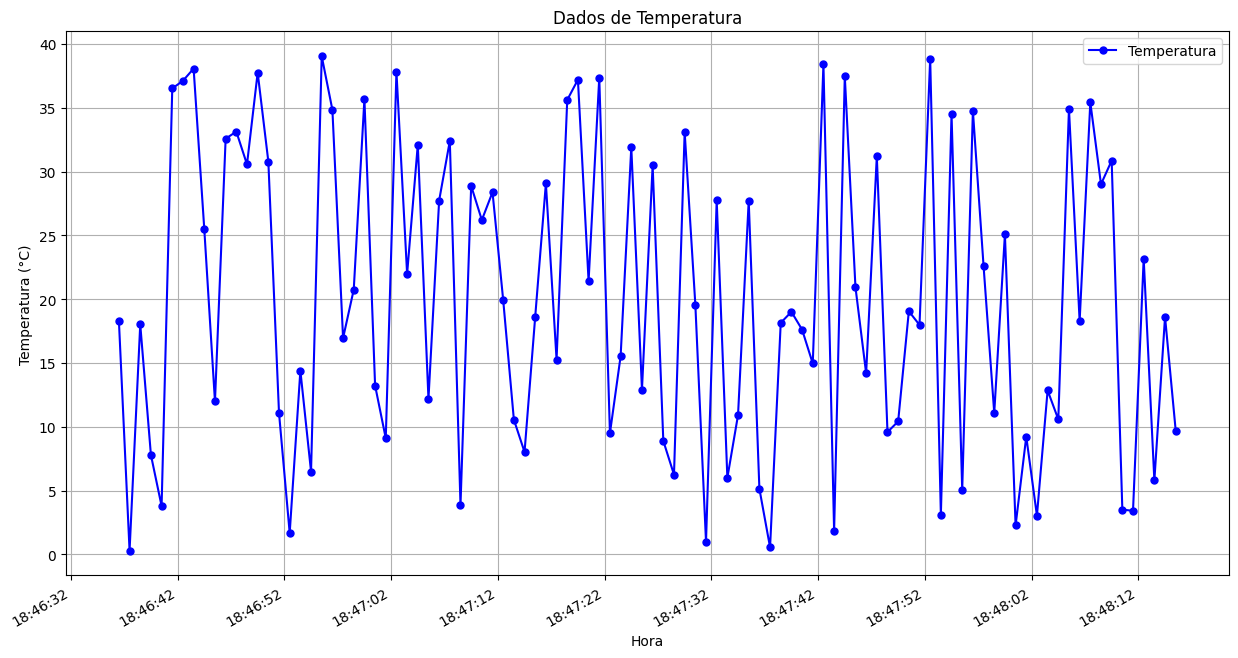

In [ ]:
mycursor = mydb.cursor(dictionary=True)

temperatures = [random.uniform(0, 40) for _ in range(100)]
now = datetime.datetime.now()
date_list = [now + timedelta(seconds=i) for i in range(100)]

sql_insert = "INSERT INTO dados (valor) VALUES (%s)"
for temp in temperatures:
    mycursor.execute(sql_insert, (temp,))
    mydb.commit()

sql_select = "SELECT * FROM dados ORDER BY id DESC LIMIT 100"
mycursor.execute(sql_select)
resultados = mycursor.fetchall()
resultados.reverse()

tipo_dado_nome = "Temperatura"
sensor_nome = " IR MLX90614"

output = []
for row in resultados:
    output.append({
        "id": row["id"],
        "valor_leitura": float(row["valor"]),
        "tipo_dado": {
            "nome": tipo_dado_nome
        },
        "sensor": {
            "nome": sensor_nome
        }
    })

print(json.dumps(output, indent=2, ensure_ascii=False))

x_axis = mdates.date2num(date_list)

plt.figure(figsize=(15, 8))
plt.plot(x_axis, temperatures, marker='o', linestyle='-', color='b', markersize=5, label=tipo_dado_nome)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=10))

plt.xlabel("Hora")
plt.ylabel("Temperatura (°C)")
plt.title("Dados de Temperatura")
plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

mycursor.close()
mydb.close()

Algoritmo Fator Potência

[
  {
    "id": 302,
    "valor_leitura": 0.7,
    "tipo_dado": {
      "nome": "Fator de Potência"
    },
    "sensor": {
      "nome": "PZEM-004T"
    }
  },
  {
    "id": 303,
    "valor_leitura": 0.95,
    "tipo_dado": {
      "nome": "Fator de Potência"
    },
    "sensor": {
      "nome": "PZEM-004T"
    }
  },
  {
    "id": 304,
    "valor_leitura": 0.52,
    "tipo_dado": {
      "nome": "Fator de Potência"
    },
    "sensor": {
      "nome": "PZEM-004T"
    }
  },
  {
    "id": 305,
    "valor_leitura": 0.97,
    "tipo_dado": {
      "nome": "Fator de Potência"
    },
    "sensor": {
      "nome": "PZEM-004T"
    }
  },
  {
    "id": 306,
    "valor_leitura": 0.88,
    "tipo_dado": {
      "nome": "Fator de Potência"
    },
    "sensor": {
      "nome": "PZEM-004T"
    }
  },
  {
    "id": 307,
    "valor_leitura": 0.76,
    "tipo_dado": {
      "nome": "Fator de Potência"
    },
    "sensor": {
      "nome": "PZEM-004T"
    }
  },
  {
    "id": 308,
    "valor_leitura": 0.73,

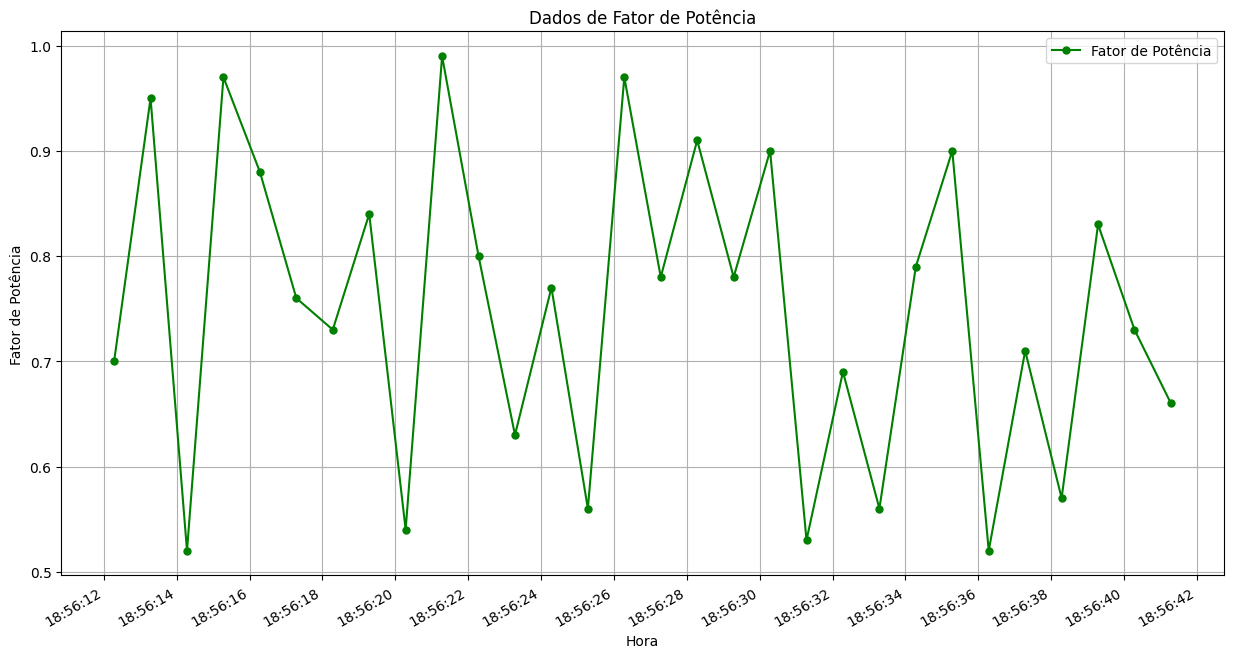

In [ ]:

import random
import mysql.connector
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from datetime import timedelta
import json

mydb = mysql.connector.connect(
    host="localhost",
    user="urubu100",
    password="urubu100",
    database="algas"
)
mycursor = mydb.cursor(dictionary=True)

def gerar_dados_pzem():
    tensao = round(random.uniform(80, 260), 1)
    corrente = round(random.uniform(0, 100), 2)
    potencia_aparente = round(tensao * corrente, 1)
    fator_potencia = round(random.uniform(0.5, 1.0), 2)
    return fator_potencia

fatores_potencia = [gerar_dados_pzem() for _ in range(30)]
now = datetime.datetime.now()
date_list = [now + timedelta(seconds=i) for i in range(30)]

sql_insert = "INSERT INTO dados (valor) VALUES (%s)"
for fator in fatores_potencia:
    mycursor.execute(sql_insert, (fator,))
    mydb.commit()

sql_select = "SELECT * FROM dados ORDER BY id DESC LIMIT 30"
mycursor.execute(sql_select)
resultados = mycursor.fetchall()
resultados.reverse()

tipo_dado_nome = "Fator de Potência"
sensor_nome = "PZEM-004T"

output = []
for row in resultados:
    output.append({
        "id": row["id"],
        "valor_leitura": float(row["valor"]),
        "tipo_dado": {
            "nome": tipo_dado_nome
        },
        "sensor": {
            "nome": sensor_nome
        }
    })

print(json.dumps(output, indent=2, ensure_ascii=False))

x_axis = mdates.date2num(date_list)

plt.figure(figsize=(15, 8))
plt.plot(x_axis, fatores_potencia, marker='o', linestyle='-', color='g', markersize=5, label=tipo_dado_nome)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=2))

plt.xlabel("Hora")
plt.ylabel("Fator de Potência")
plt.title("Dados de Fator de Potência")
plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

mycursor.close()
mydb.close()


Algoritmo Ámpere

In [ ]:
import time
import os
import random
import json
import mysql.connector

os.environ['TZ'] = 'America/Sao_Paulo'
time.tzset()

mydb = mysql.connector.connect(
    host="localhost",
    user="urubu100",
    password="urubu100",
    database="algas"
)
mycursor = mydb.cursor()

def calculate_current(primary_voltage):
    primary_enroll = 1
    secundary_enroll = 160
    power = 25

    primary_current = power / primary_voltage
    secundary_current = primary_current * (secundary_enroll / primary_enroll)

    if secundary_current < 5:
        secundary_current = 5

    format_time = time.strftime('%H:%M:%S')

    return {
        "valor_leitura": {
            "corrente_primaria": round(primary_current, 4),
            "corrente_secundaria": round(secundary_current, 4),
            "tempo": format_time
        },
        "tipo_dado": {
            "nome": "Ampere"
        },
        "sensor": {
            "nome": "RCI-32"
        }
    }

sample = 30

records = []

for _ in range(sample):
    primary_voltage = random.randint(1000, 36000)
    record = calculate_current(primary_voltage)
    records.append(record)

    sql_insert = "INSERT INTO dados (valor) VALUES (%s)"
    mycursor.execute(sql_insert, (record["valor_leitura"]["corrente_primaria"],))
    mydb.commit()

mycursor.close()
mydb.close()

print(json.dumps(records, indent=2, ensure_ascii=False))


[
  {
    "valor_leitura": {
      "corrente_primaria": 0.0058,
      "corrente_secundaria": 5,
      "tempo": "19:11:14"
    },
    "tipo_dado": {
      "nome": "Ampere"
    },
    "sensor": {
      "nome": "RCI-32"
    }
  },
  {
    "valor_leitura": {
      "corrente_primaria": 0.0049,
      "corrente_secundaria": 5,
      "tempo": "19:11:14"
    },
    "tipo_dado": {
      "nome": "Ampere"
    },
    "sensor": {
      "nome": "RCI-32"
    }
  },
  {
    "valor_leitura": {
      "corrente_primaria": 0.0011,
      "corrente_secundaria": 5,
      "tempo": "19:11:14"
    },
    "tipo_dado": {
      "nome": "Ampere"
    },
    "sensor": {
      "nome": "RCI-32"
    }
  },
  {
    "valor_leitura": {
      "corrente_primaria": 0.0023,
      "corrente_secundaria": 5,
      "tempo": "19:11:14"
    },
    "tipo_dado": {
      "nome": "Ampere"
    },
    "sensor": {
      "nome": "RCI-32"
    }
  },
  {
    "valor_leitura": {
      "corrente_primaria": 0.0014,
      "corrente_secundaria": 5,


Algoritmo Harmonica

In [ ]:
from random import uniform, randint

In [ ]:
def get_harmonics(noise = 1):

    # Noise/ruído: indica a faixa de valores que poderão ser retornados. Em situações normais, o valor da harmônica deve estar entre 0% e 5%, onde, quando maior for essa porcentagem,
    # pior é a qualidade da energia.

    # Valores disponíveis para noise:
    # 1 - Low
    # 2 - Medium
    # 3 - High
    # 3 - Very High

    if (noise == 1):
        minimum = 0.00
        maximum = 5.00
    elif (noise == 2):
        minimum = 0.00
        maximum = 25.00
    elif (noise == 3):
        minimum = 0.00
        maximum = 75.00
    elif (noise == 4):
        minimum = 0.00
        maximum = 100.00
    else:
        print(f"No such value ({noise}) for noise is allowed. Using default values.")
        minimum = 0.00
        maximum = 5.00

    accuracy = 1.0

    # se o valor do random for 0, irá somar 1 no valor final da harmônica. Se for 1, irá diminuir 1 no valor final da harmônica.
    is_accuracy_positive_or_negative = randint(0, 1)

    harmonics = accuracy + (uniform(minimum, maximum)) if is_accuracy_positive_or_negative == 0 else (uniform(minimum, maximum)) - accuracy

    if(harmonics < 0):
        harmonics = 0.01
    if(harmonics > 100):
        harmonics = 100.00

    return {
        "valor_leitura": round(harmonics,2),
        "tipo_dado": {
            "nome": "Harmônicas",
            "descricao": "Valor da harmônica obtido pelo sensor."
        },
        "sensor": {
            "nome": "AcuRev 2100 Multi-Circuit",
            "fabricante": "AccuEnergy",
            "datasheet": "https://www.accuenergy.com/wp-content/uploads/AcuRev-2100-Multi-Circuit-Submeter-Datasheet.pdf"
        }
    }


In [ ]:
noise = 4

print(get_harmonics(noise))
print(get_harmonics(noise)["valor_leitura"])

{'valor_leitura': 99.05, 'tipo_dado': {'nome': 'Harmônicas', 'descricao': 'Valor da harmônica obtido pelo sensor.'}, 'sensor': {'nome': 'AcuRev 2100 Multi-Circuit', 'fabricante': 'AccuEnergy', 'datasheet': 'https://www.accuenergy.com/wp-content/uploads/AcuRev-2100-Multi-Circuit-Submeter-Datasheet.pdf'}}
26.05


Algoritmo Tensão

In [ ]:
!pip install matplotlib
!pip install tqdm
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
BASE = 23000

def capturar_tensao():
    variacao_moment = np.random.normal(0, 150)

    pico = 0
    if np.random.rand() < 0.001:
        pico = np.random.pareto(2) * 1000
    if np.random.pareto(2) < 1:
        pico = -pico

    return BASE + variacao_moment + pico

def execucao(max):
    sizes = range(1, max+1, 1)

    tensions = []
    for n in tqdm(sizes):
        data = 'g' * n

        while data:
            data = data[1:]
            tensions.append(capturar_tensao())
    return tensions

e = execucao(10)
pass

100%|██████████| 10/10 [00:00<00:00, 18901.78it/s]


In [ ]:
tamanhos = [10, 100, 1000, 10000]
tensoes = []
for i, t in enumerate(tamanhos):
    print(f"Execução {i+1}.")
    tensoes.append(execucao(t))

 22%|██▏       | 216/1000 [00:00<00:00, 2151.62it/s]

Execução 1.
Execução 2.
Execução 3.


  3%|▎         | 316/10000 [00:00<00:05, 1628.97it/s]

Execução 4.


100%|██████████| 10000/10000 [03:08<00:00, 52.95it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


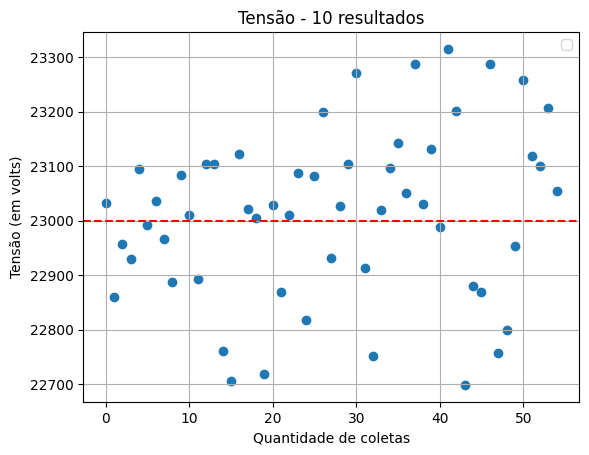

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


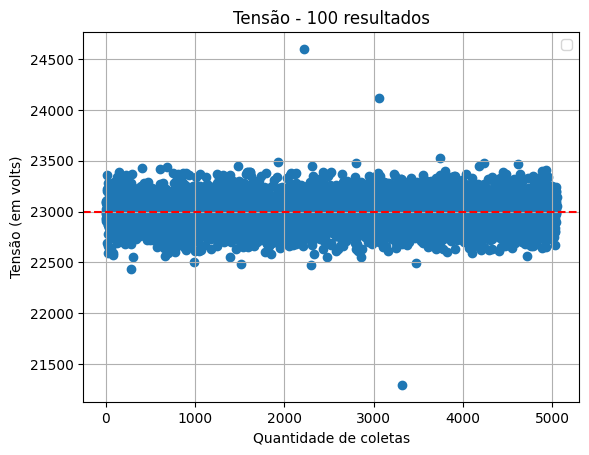

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


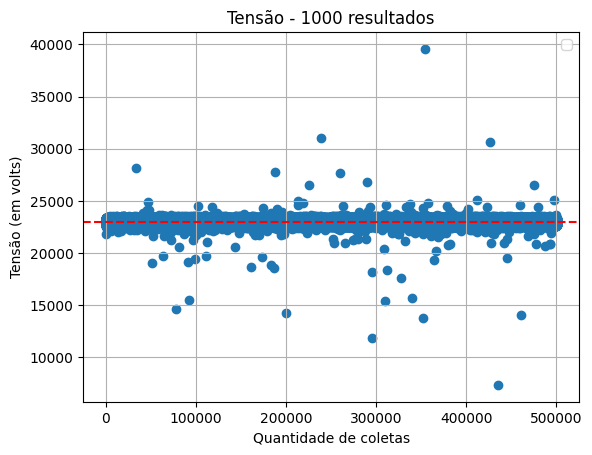

: 

In [ ]:
for i, t in enumerate(tamanhos):
    plt.title(f"Tensão - {t} resultados")
    plt.xlabel('Quantidade de coletas')
    plt.ylabel('Tensão (em volts)')
    plt.axhline(BASE, color="red", linestyle="--")
    plt.grid(True)
    plt.legend()

    plt.scatter(range(len(tensoes[i])), tensoes[i], label=f'{t} - Tensões')
    plt.show()

Algoritmo Frêquencia

In [ ]:
import time
import sys
import math
import random
import psutil as ps
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector
from datetime import datetime

In [ ]:
mydb = mysql.connector.connect(
  host="localhost",
  user="urubu100",
  password="urubu100",
  database="algas"
)

mycursor = mydb.cursor()
sql = "INSERT INTO dados (valor) VALUES (%s)"

In [ ]:
def get_transactions(start, stop, step):
    transactions = []
    for i in range(start, stop, step):
        transactions.append(i)
    return transactions

In [ ]:
def get_time():
    agora = time.time()
    hoje_meia_noite = datetime.combine(datetime.today(), datetime.min.time())
    meia_noite_timestamp = time.mktime(hoje_meia_noite.timetuple())
    diferenca_segundos = agora - meia_noite_timestamp
    diferenca_minutos = diferenca_segundos / 60

    return diferenca_minutos


In [ ]:
def run(start, stop, step):
    transactions = get_transactions(start, stop, step)
    arr = []
    arrTime = []
    for transaction in transactions:
        val = round(random.uniform(59.9,60.1),2)
        if random.randint(1,50) == 23:
            val = val + random.randint(1,50)
        arr.append(val)
        mycursor.execute(sql, (val,))
        mydb.commit()

        arrTime.append(math.floor(get_time() * 100) / 100,)



    return {
        'dados': arr,
        'times': arrTime,
    }

In [ ]:
def plot(data):
  xpoints = np.array(list(range(0, len(data))))
  ypoints = np.array(data)
  plt.plot(xpoints, ypoints)
  plt.show()

In [ ]:
def plot(data):
  xpoints = np.array(list(range(0, len(data))))
  ypoints = np.array(data)
  plt.plot(xpoints, ypoints)
  plt.show()

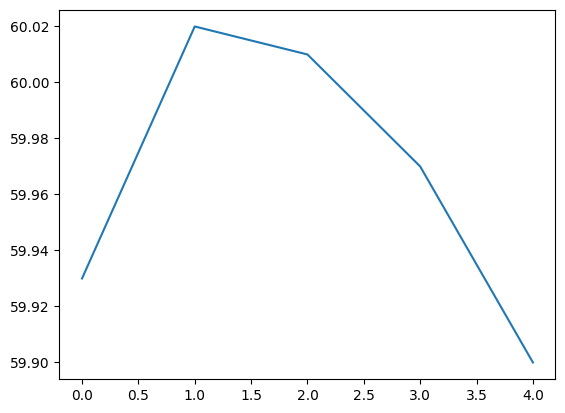

In [ ]:
result = run(100, 600, 100)

plot(result['dados'])

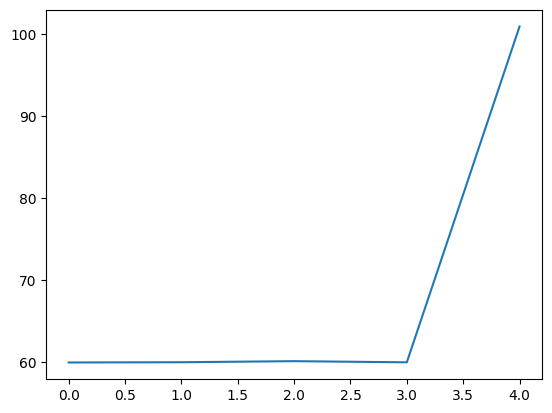

In [ ]:
result = run(1_000, 6_000, 1_000)

plot(result['dados'])

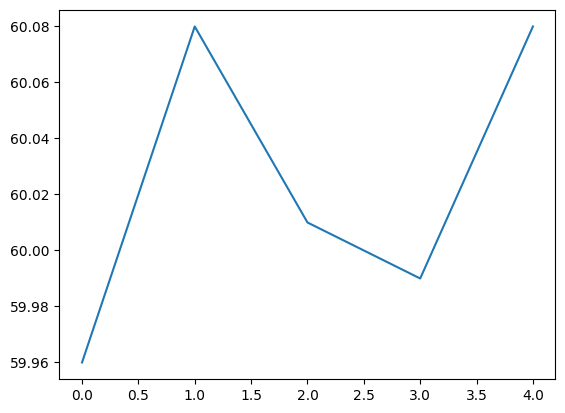

In [ ]:
result = run(100_000, 600_000, 100_000)

plot(result['dados'])

In [ ]:
result = run(1_000_000, 6_000_000, 1_0)

plot(result['dados'])